In [57]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

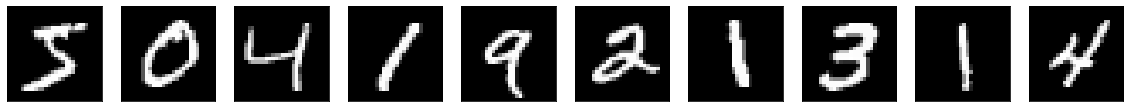

In [48]:
import matplotlib.pyplot as plt

n = 10  # how many records we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [49]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

# The encoding process
input_img = Input(shape=(28, 28, 1))  

In [50]:
############
# Encoding #
############
# Note:
# padding is a hyper-arameter for either 'valid' or 'same'. 
# "valid" means "no padding". 
# "same" results in padding the input such that the output has the same length as the original input.

# Conv1 #
x = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

# Conv2 #
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x) 

# Conv 3 #
x = Conv2D(filters = 8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

In [51]:
############
# Decoding #
############

# DeConv1
x = Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D(size=(2, 2))(x)

# DeConv2
x = Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = UpSampling2D(size=(2, 2))(x)

# DeConv3
x = Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(filters=1, kernel_size=(3, 3), activation='sigmoid', padding='same')(x)

In [52]:
# Decalre the Model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [61]:
# train the model
x_train=x_train.reshape([-1,28, 28,1])
autoencoder.fit(x_train, x_train, epochs=100, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

ValueError: Error when checking input: expected input_8 to have 4 dimensions, but got array with shape (10000, 28, 28)

In [43]:
decoded_images = autoencoder.predict(x_test)

ValueError: Error when checking input: expected input_7 to have 4 dimensions, but got array with shape (10000, 28, 28)

In [ ]:
n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original 
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction 
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()